In [37]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
 
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
 
train_dataset = datasets.ImageFolder(
    root='train',
 
 
 
    transform=train_transform
)
 
val_dataset = datasets.ImageFolder(
    root='val',
    transform=train_transform
)
 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [38]:
import torch.nn as nn
import torch.nn.functional as F
 
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
       
        self.fc1 = nn.Linear(32 * (128//4) * (128//4), 64)
        self.fc2 = nn.Linear(64, num_classes)
   
    def forward(self, x):
        print(x.shape)
        x = F.relu(self.conv1(x))
        print(x.shape)
        x = self.pool(x)
        print(x.shape)
        x = F.relu(self.conv2(x))
        print(x.shape)
        x = self.pool(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = F.relu(self.fc1(x))
        print(x.shape)
        x = self.fc2(x)
        print(x.shape)
        return x

In [39]:
import torch.optim as optim
 
model = SimpleCNN(num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
   
    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')


torch.Size([32, 3, 128, 128])
torch.Size([32, 16, 128, 128])
torch.Size([32, 16, 64, 64])
torch.Size([32, 32, 64, 64])
torch.Size([32, 32, 32, 32])
torch.Size([32, 32768])
torch.Size([32, 64])
torch.Size([32, 3])
torch.Size([19, 3, 128, 128])
torch.Size([19, 16, 128, 128])
torch.Size([19, 16, 64, 64])
torch.Size([19, 32, 64, 64])
torch.Size([19, 32, 32, 32])
torch.Size([19, 32768])
torch.Size([19, 64])
torch.Size([19, 3])
Epoch [1/20], Loss: 1.2190
torch.Size([32, 3, 128, 128])
torch.Size([32, 16, 128, 128])
torch.Size([32, 16, 64, 64])
torch.Size([32, 32, 64, 64])
torch.Size([32, 32, 32, 32])
torch.Size([32, 32768])
torch.Size([32, 64])
torch.Size([32, 3])
torch.Size([19, 3, 128, 128])
torch.Size([19, 16, 128, 128])
torch.Size([19, 16, 64, 64])
torch.Size([19, 32, 64, 64])
torch.Size([19, 32, 32, 32])
torch.Size([19, 32768])
torch.Size([19, 64])
torch.Size([19, 3])
Epoch [2/20], Loss: 0.9694
torch.Size([32, 3, 128, 128])
torch.Size([32, 16, 128, 128])
torch.Size([32, 16, 64, 64])
torc

In [40]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')

torch.Size([13, 3, 128, 128])
torch.Size([13, 16, 128, 128])
torch.Size([13, 16, 64, 64])
torch.Size([13, 32, 64, 64])
torch.Size([13, 32, 32, 32])
torch.Size([13, 32768])
torch.Size([13, 64])
torch.Size([13, 3])
Validation Accuracy: 84.62%


torch.Size([1, 3, 128, 128])
torch.Size([1, 16, 128, 128])
torch.Size([1, 16, 64, 64])
torch.Size([1, 32, 64, 64])
torch.Size([1, 32, 32, 32])
torch.Size([1, 32768])
torch.Size([1, 64])
torch.Size([1, 3])


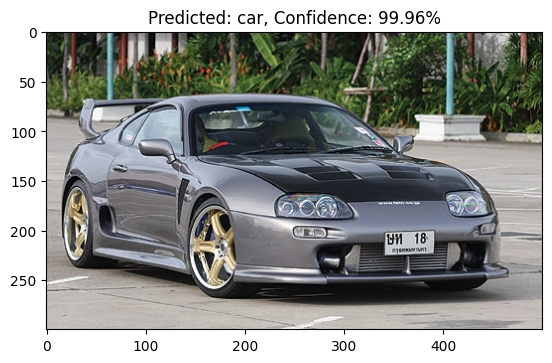

In [41]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
 
# Load and transform the external image
image_path = r"C:\Users\lamin\OneDrive\Desktop\4201_AI\train\train\car\19-01.jpg"
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
image = transform(image).unsqueeze(0)  # Add batch dimension
 
# Assume 'model' is your trained SimpleCNN model
model.eval()  # Set the model to evaluation mode
 
# Predict
with torch.no_grad():
    outputs = model(image)
    probabilities = F.softmax(outputs, dim=1)  # Apply softmax to convert to probabilities
    max_prob, predicted = torch.max(probabilities, 1)  # Get the prediction and its confidence
 
# Load the image for displaying
image_display = Image.open(image_path)
plt.imshow(image_display)
predicted_class = val_dataset.classes[predicted[0]]
plt.title(f'Predicted: {predicted_class}, Confidence: {max_prob.item()*100:.2f}%')
plt.show()